In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("../res/lungcancer.csv")
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [27]:
df = df.drop(["Name", "Surname"], axis = 1)
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [28]:
x = df.drop("Result", axis = 1)
x.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [29]:
y = df["Result"]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
best_accuracy = 0
best_k = 0
accuracy_list = []

for k in range(1, 10):
    KNN = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(KNN, x, y, cv=5)
    avg_accuracy = scores.mean()
    accuracy_list.append(avg_accuracy)

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_k = k

In [33]:
KNN = KNeighborsClassifier(n_neighbors = best_k)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
y_pred = KNN.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best k value:", best_k)
print("Accuracy score:", accuracy)

Best k value: 1
Accuracy score: 1.0


Text(70.72222222222221, 0.5, 'Actual')

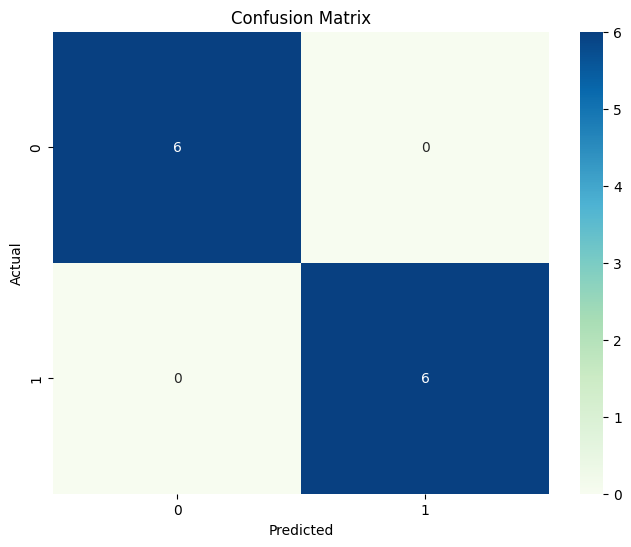

In [35]:
confusionMatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusionMatrix, annot = True, fmt = 'd', cmap = "GnBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')